<a href="https://colab.research.google.com/github/sulthannauval/MachineLearning-Course/blob/main/Tugas-Minggu-11/11_LeNet_Sulthan_1103213065.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Lecture 11 - LeNet - CIFAR-10

---

*   Sulthan Nauval Abdillah
*   1103213065
*   Link ChatGPT : [link text](https://chatgpt.com/share/782ffdb7-24ab-484c-b580-6b8c322f56b8)

## Import Library

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

## Read Dataset

In [2]:
# 1. Muat dan pra-proses data CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


## Pre-Processing

In [3]:
# Normalisasi nilai piksel menjadi [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Ubah label menjadi one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Training Model

In [5]:
# 2. Definisikan arsitektur model LeNet
model = models.Sequential()

# Layer Convolutional 1
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.AveragePooling2D())
# Layer Convolutional 2
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.AveragePooling2D())
# Flatten layer
model.add(layers.Flatten())
# Fully Connected Layer 1
model.add(layers.Dense(120, activation='relu'))
# Fully Connected Layer 2
model.add(layers.Dense(84, activation='relu'))
# Output Layer
model.add(layers.Dense(10, activation='softmax'))

In [6]:
# 3. Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# 4. Latih model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 4s 5ms/step - loss: 0.9495 - accuracy: 0.6653 - val_loss: 1.1518 - val_accuracy: 0.6016
Epoch 2/10
782/782 [==============================] - 4s 6ms/step - loss: 0.9230 - accuracy: 0.6739 - val_loss: 1.1288 - val_accuracy: 0.6120
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.8927 - accuracy: 0.6838 - val_loss: 1.1239 - val_accuracy: 0.6113
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.8676 - accuracy: 0.6909 - val_loss: 1.1492 - val_accuracy: 0.6107
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.8426 - accuracy: 0.7023 - val_loss: 1.1788 - val_accuracy: 0.5996
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.8200 - accuracy: 0.7096 - val_loss: 1.1517 - val_accuracy: 0.6163
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.7953 - accuracy: 0.7191 - val_loss: 1.1947 - val_accuracy: 0.6129
Epoch 

## Evaluate Model

In [11]:
# 5. Evaluasi model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - loss: 1.2038 - accuracy: 0.6096 - 661ms/epoch - 2ms/step

Test accuracy: 0.6096000075340271


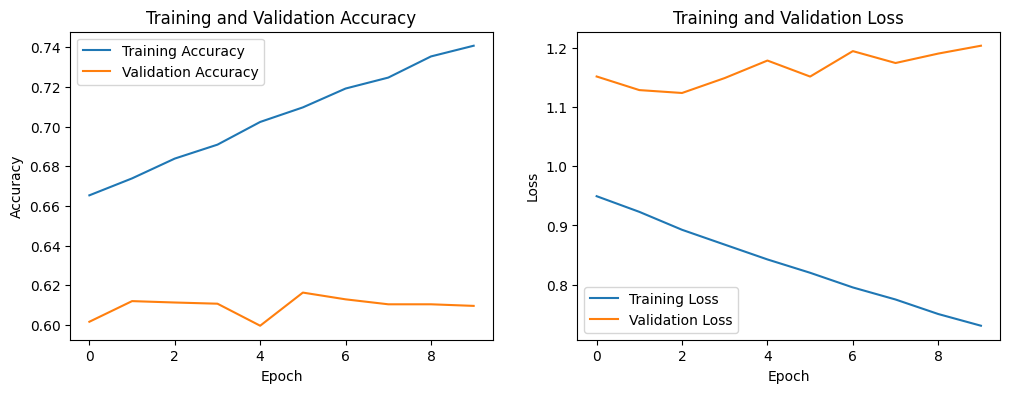

In [12]:
# 6. Visualisasikan hasil pelatihan
# Plot akurasi pelatihan dan validasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss pelatihan dan validasi
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()